Try to improve the preprocessing.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.tabular import *
#import kaggle

In [4]:
#! kaggle competitions download -c house-prices-advanced-regression-techniques -p {path}

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
path = Path('data')
path.mkdir(parents=True, exist_ok=True)

In [10]:
dep_var = 'SalePrice'

cat_names = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour',
             'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
            'Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
            'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
            'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
            'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
            'CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath',
            'HalfBath','KitchenQual','TotRmsAbvGrd',
            'Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt',
            'GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive',
            'PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType',
             'SaleCondition','YearBuilt','YearRemodAdd','BedroomAbvGr', 'KitchenAbvGr']

cont_names = ['LotFrontage','LotArea','MasVnrArea',
              'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF',
             'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
             'MiscVal']

## Skip to 'Load preprocessed Dataframe' if already preprocessed

In [6]:
train_df = pd.read_csv(path / 'train.csv')
test_df = pd.read_csv(path / 'test.csv')

In [7]:
train_df['is_test'] = False

test_df['SalePrice'] = np.nan
test_df['is_test'] = True

df_all = pd.concat([train_df,test_df])

In [8]:
df_all.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_test
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,True
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,True
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,True
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,True
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,True


## Preprocessing
A missing in this dataset either means there is none (e.g. 'there is no swimmingpool') or an actual missing.

If it is an actual missing, we fill it with the mean (cont. variables) or mode  (cond. variables) & add a '_miss'-column. If it makes sense we fill those values determined by subgroups.

Otherwise the Null value is replaced by  'None'.

First, remove outliers.

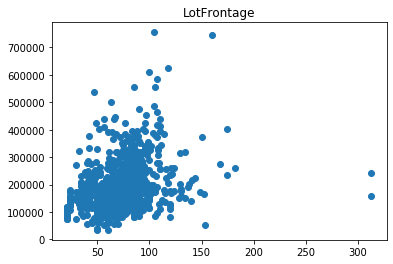

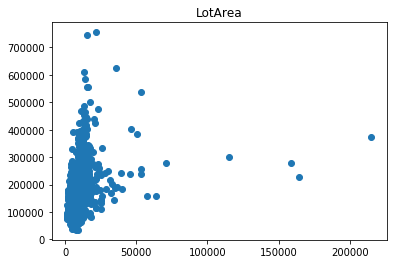

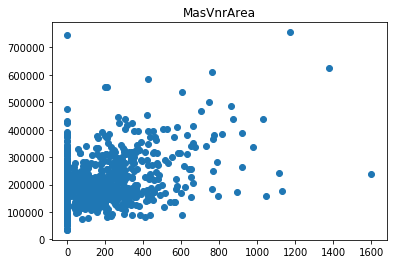

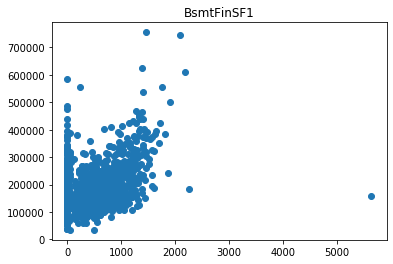

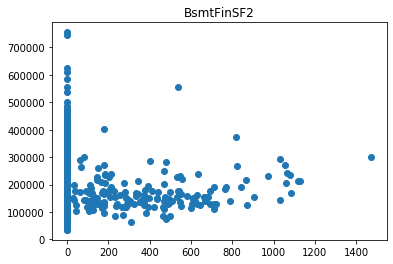

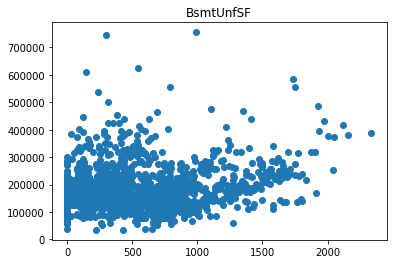

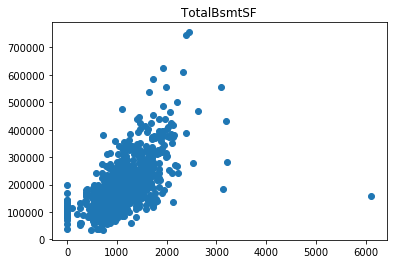

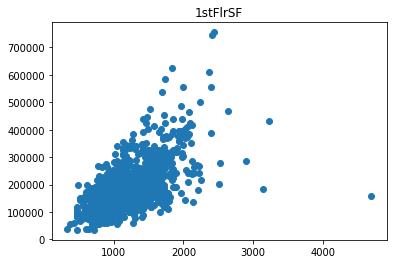

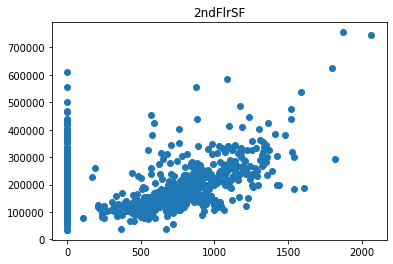

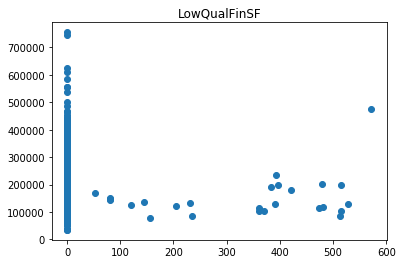

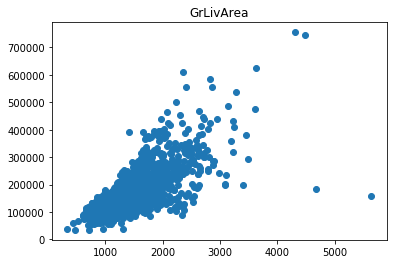

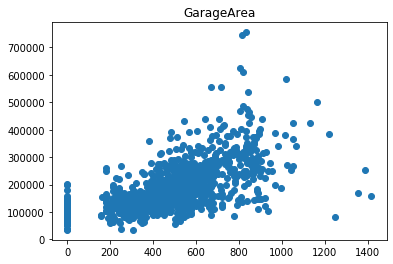

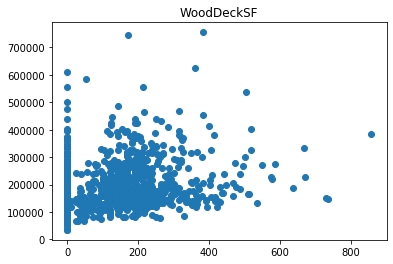

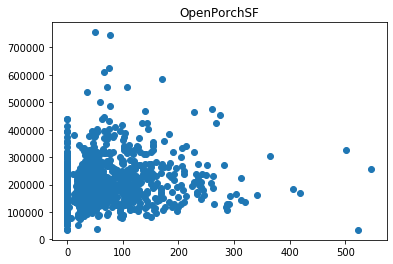

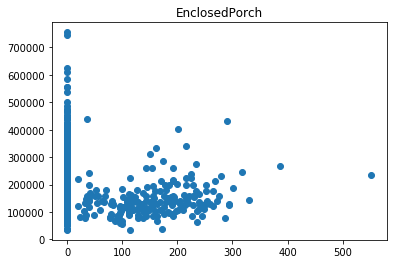

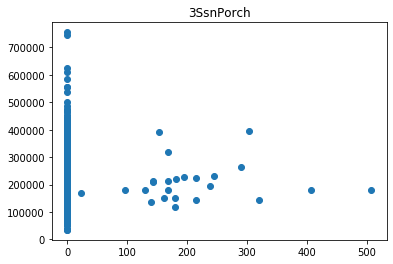

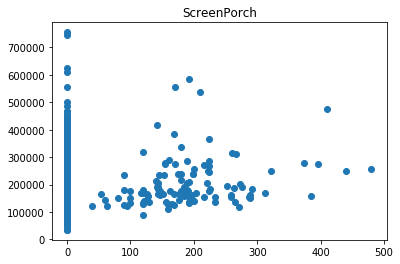

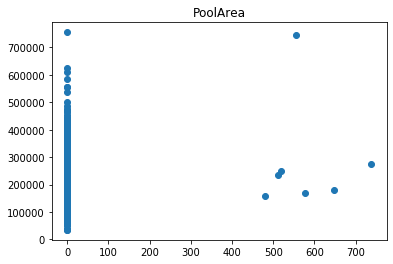

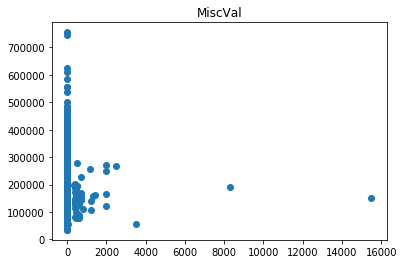

In [10]:
df_rel = df_all[df_all['is_test'] == False]
for col in cont_names:
    plt.title(col)
    plt.scatter(df_rel[col], df_rel['SalePrice'])
    plt.show()

In [11]:
cond = ((df_all['LotFrontage'] > 200) |
(df_all['LotArea'] > 100000 ) |
(df_all['MasVnrArea'] > 1500) |
(df_all['BsmtFinSF1'] > 5000) |
(df_all['BsmtFinSF2'] > 1400) |
(df_all['TotalBsmtSF'] > 6000) |
(df_all['1stFlrSF'] > 4000) |
((df_all['GrLivArea'] > 4000) & (df_all['SalePrice'] < 300000)) |
((df_all['OpenPorchSF'] > 500) & (df_all['SalePrice'] < 100000)) |
(df_all['SalePrice'] > 700000)) & (df_all['is_test'] == False)

In [12]:
df_all = df_all[~ cond]

In [13]:
# Function to check which columns still contain missings.
def check_nan():
    nan_list = df_all[df_all.columns[df_all.isnull().any()]].columns.tolist()
    return nan_list

We go through the following list of columns that contain missing values. We remove all columns that only contain actual 'there is no (swimmingpool)' values.

In [14]:
nan_list = check_nan()
nan_list.remove('SalePrice')
print(nan_list)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


### MSZoning

In [15]:
df_all['MSZoning_miss'] = df_all['MSZoning'].isnull()

In [16]:
df_grouped = df_all.groupby(['Neighborhood','Condition1','Condition2'])['MSZoning'].apply(pd.Series.mode)
df_grouped = df_grouped.to_frame().reset_index()

def fill_MSZoning(row):
    condition = np.array([True] * df_grouped.shape[0])
    
    condition = ((df_grouped['Neighborhood'] == row['Neighborhood']) &
                 (df_grouped['Condition1'] == row['Condition1']) &
                 (df_grouped['Condition2'] == row['Condition2'])
                )
    return df_grouped[condition]['MSZoning'].values[0]

df_all['MSZoning'] = df_all.apply(lambda x: fill_MSZoning(x) if pd.isna(x['MSZoning']) else x['MSZoning'], axis = 1)

### LotFrontage

In [17]:
df_all['LotFrontage_miss'] = df_all['LotFrontage'].isnull()

In [18]:
df_grouped = df_all.groupby(['LotShape','LotConfig','BldgType'])['LotFrontage'].apply(pd.Series.mean)
df_grouped = df_grouped.to_frame().reset_index()

def fill_LotFrontage(row):
    condition = np.array([True] * df_grouped.shape[0])
    
    condition = ((df_grouped['LotShape'] == row['LotShape']) &
                 (df_grouped['LotConfig'] == row['LotConfig']) &
                 (df_grouped['BldgType'] == row['BldgType'])
                )
    
    return df_grouped[condition]['LotFrontage'].values[0]

df_all['LotFrontage'] = df_all.apply(lambda x: fill_LotFrontage(x) if pd.isna(x['LotFrontage']) else x['LotFrontage'], axis = 1)

### Alley
NaN in data is: has no Alley 

In [19]:
nan_list.remove('Alley')
df_all['Alley'] = df_all['Alley'].fillna(value = 'None')

### Utilities
Two misses, all but one is 'AllPub'

In [20]:
df_all['Utilities_miss'] = df_all['Utilities'].isnull()
df_all['Utilities'] = df_all['Utilities'].fillna(value = 'AllPub')

### Exterior1st

In [21]:
df_all['Exterior1st_miss'] = df_all['Exterior1st'].isnull()

In [22]:
df_grouped = df_all.groupby(['Neighborhood'])['Exterior1st'].apply(pd.Series.mode)
df_grouped = df_grouped.to_frame().reset_index()
df_grouped = df_grouped.drop(['level_1'],axis = 1)

def fill_Exterior1st(row):
    condition = df_grouped['Neighborhood'] == row['Neighborhood']
                 
    return df_grouped[condition]['Exterior1st'].values[0]

df_all['Exterior1st'] = df_all.apply(lambda x: fill_Exterior1st(x) if pd.isna(x['Exterior1st']) else x['Exterior1st'], axis = 1 )

### Exterior2nd
Only one missing. Most likely there is no 2nd Exterior covering. Fill anyhow, since it is only one

In [23]:
df_all['Exterior2nd_miss'] = df_all['Exterior2nd'].isnull()

In [24]:
df_grouped = df_all.groupby(['Neighborhood'])['Exterior2nd'].apply(pd.Series.mode).to_frame().reset_index().drop(['level_1'],axis = 1)

def fill_Exterior2nd(row):
    condition = df_grouped['Neighborhood'] == row['Neighborhood']
                 
    return df_grouped[condition]['Exterior2nd'].values[0]

df_all['Exterior2nd'] = df_all.apply(lambda x: fill_Exterior2nd(x) if pd.isna(x['Exterior2nd']) else x['Exterior2nd'], axis = 1 )

### MasVnrType

In [25]:
df_all.loc[(df_all['MasVnrType'] == 'None') & 
           (df_all['MasVnrArea'] > 3.0),'MasVnrType'] = np.nan

In [26]:
df_all['MasVnrType_miss'] = df_all['MasVnrType'].isnull()

In [27]:
df_grouped = df_all[df_all['MasVnrType'] != 'None'].groupby(['Neighborhood'])['MasVnrType'].apply(pd.Series.mode)
df_grouped = df_grouped.to_frame().reset_index().drop(['level_1'],axis = 1)

def fill_MasVnrType(row):
    condition = df_grouped['Neighborhood'] == row['Neighborhood']
                 
    return df_grouped[condition]['MasVnrType'].values[0]

df_all['MasVnrType'] = df_all.apply(lambda x: fill_MasVnrType(x) if pd.isna(x['MasVnrType']) else x['MasVnrType'], axis = 1 )

### MasVnrArea

In [28]:
df_all.loc[df_all['MasVnrType'] == 'None','MasVnrArea'] = 0.0

In [29]:
df_all['MasVnrArea_miss'] = df_all['MasVnrArea'].isnull()

In [30]:
df_grouped = df_all[df_all['MasVnrType'] != 'None'].groupby(['BldgType','MasVnrType','HouseStyle'])['MasVnrArea'].apply(pd.Series.mean)
df_grouped = df_grouped.to_frame().reset_index()

def fill_MasVnrArea(row):
    condition = np.array([True] * df_grouped.shape[0])
    
    condition = ((df_grouped['BldgType'] == row['BldgType']) &
                 (df_grouped['MasVnrType'] == row['MasVnrType']) &
                 (df_grouped['HouseStyle'] == row['HouseStyle'])
                )
    
    return df_grouped[condition]['MasVnrArea'].values[0]

df_all['MasVnrArea'] = df_all.apply(lambda x: fill_MasVnrArea(x) if pd.isna(x['MasVnrArea']) else x['MasVnrArea'], axis = 1)

### Basement
Two instances are NaN, when State is 'Unf'. All the others dont have a basement...

In [31]:
df_all['BsmtQual_miss'] = df_all['BsmtQual'].isnull() & (df_all['BsmtFinType1'] == 'Unf')
df_all.loc[df_all['BsmtQual'].isnull() & (df_all['BsmtFinType1'] == 'Unf'),'BsmtQual'] = 'Unf'

Missing Labels for 'Quality', fill with mode

In [32]:
df_all['BsmtCond_miss'] = (~df_all['BsmtQual'].isnull()) & (df_all['BsmtCond']).isnull()
df_all.loc[(~df_all['BsmtQual'].isnull()) & (df_all['BsmtCond']).isnull(),'BsmtCond'] = df_all['BsmtCond'].mode().to_list()[0]

Fill 'Exposure' by mode, given from 'Neighborhood' & 'Slope'

In [33]:
df_all['BsmtExposure_miss'] = (~df_all['BsmtQual'].isnull()) & (df_all['BsmtExposure'].isnull())

In [34]:
df_grouped = df_all.groupby(['Neighborhood','LandSlope'])['BsmtExposure'].apply(pd.Series.mode)
df_grouped = df_grouped.to_frame().reset_index().drop(['level_2'],axis = 1)

def fill_BsmtExposure(row):
    condition = np.array([True] * df_grouped.shape[0])
    
    condition = ((df_grouped['Neighborhood'] == row['Neighborhood']) &
                 (df_grouped['LandSlope'] == row['LandSlope'])
                )
    
    return df_grouped[condition]['BsmtExposure'].values[0]

df_all.loc[~df_all['BsmtQual'].isnull(),'BsmtExposure'] = df_all[~df_all['BsmtQual'].isnull()].apply(lambda x: fill_BsmtExposure(x) if pd.isna(x['BsmtExposure']) else x['BsmtExposure'], axis = 1)


Fill with same 'Qual' as FinType1

In [35]:
df_all['BsmtFinType2_miss'] = (~df_all['BsmtQual'].isnull()) & (df_all['BsmtFinType2'].isnull())
df_all.loc[(~df_all['BsmtQual'].isnull()) & (df_all['BsmtFinType2'].isnull()),'BsmtFinType2'] = 'GLQ'

Now, for all Basement Categories missing means, there is no Basement

In [36]:
df_all[(~ df_all['BsmtQual'].isnull()) & ((df_all['BsmtCond'].isnull()) | (df_all['BsmtExposure']).isnull() | 
                                         (df_all['BsmtFinType1'].isnull()) | (df_all['BsmtFinSF1']).isnull() | 
                                         (df_all['BsmtFinType2'].isnull()) | (df_all['BsmtFinSF2']).isnull() | 
                                         (df_all['BsmtUnfSF'].isnull()) | (df_all['TotalBsmtSF']).isnull()
                                         )
      ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_test,MSZoning_miss,LotFrontage_miss,Utilities_miss,Exterior1st_miss,Exterior2nd_miss,MasVnrType_miss,MasVnrArea_miss,BsmtQual_miss,BsmtCond_miss,BsmtExposure_miss,BsmtFinType2_miss


In [37]:
df_all['BsmtQual'] = df_all['BsmtQual'].fillna(value = 'None')
df_all['BsmtCond'] = df_all['BsmtCond'].fillna(value = 'None')
df_all['BsmtExposure'] = df_all['BsmtExposure'].fillna(value = 'No')
df_all['BsmtFinType1'] = df_all['BsmtFinType1'].fillna(value = 'None')
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].fillna(value = 0)
df_all['BsmtFinType2'] = df_all['BsmtFinType2'].fillna(value = 'None')
df_all['BsmtFinSF2'] = df_all['BsmtFinSF2'].fillna(value = 0)
df_all['BsmtUnfSF'] = df_all['BsmtUnfSF'].fillna(value = 0)
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].fillna(value = 0)

nan_list.remove('BsmtFinType1')
nan_list.remove('BsmtFinSF1')
nan_list.remove('BsmtFinSF2')
nan_list.remove('BsmtUnfSF')
nan_list.remove('TotalBsmtSF')

### Electrical
Only one missing. Mode for all is mode for more refined mode...

In [38]:
df_all['Electrical_miss'] = df_all['Electrical'].isnull()
df_all['Electrical'] = df_all['Electrical'].fillna(value = df_all['Electrical'].mode().to_list()[0])

### BsmtFullBath
Only two instances, dont have a basement

In [39]:
df_all['BsmtFullBath'] = df_all['BsmtFullBath'].fillna('None')
df_all['BsmtHalfBath'] = df_all['BsmtHalfBath'].fillna('None')

nan_list.remove('BsmtFullBath')
nan_list.remove('BsmtHalfBath')

### KitchenQual

In [40]:
df_all['KitchenQual_miss'] = df_all['KitchenQual'].isnull()

In [41]:
df_grouped = df_all.groupby(['OverallQual'])['KitchenQual'].apply(pd.Series.mode)
df_grouped = df_grouped.to_frame().reset_index().drop(['level_1'], axis = 1)

def fill_KitchenQual(row):
    return df_grouped[df_grouped['OverallQual'] == row['OverallQual']]['KitchenQual'].values[0]

df_all['KitchenQual'] = df_all.apply(lambda x: fill_KitchenQual(x) if pd.isna(x['KitchenQual']) else x['KitchenQual'], axis = 1)

### Functional

In [42]:
df_all['Functional_miss'] = df_all['Functional'].isnull()

In [43]:
df_grouped = df_all.groupby(['OverallCond'])['Functional'].apply(pd.Series.mode)
df_grouped = df_grouped.to_frame().reset_index().drop(['level_1'],axis = 1)

def fill_Functional(row):
    return df_grouped[df_grouped['OverallCond'] == row['OverallCond']]['Functional'].values[0]

df_all['Functional'] = df_all.apply(lambda x: fill_Functional(x) if pd.isna(x['Functional']) else x['Functional'], axis = 1)

### FireplaceQu
Only missings, if there is no fireplace

In [44]:
df_all['FireplaceQu'] = df_all['FireplaceQu'].fillna('None')
nan_list.remove('FireplaceQu')

### GarageType

Fix those, where 'Type' is not NaN first

In [45]:
df_all['GarageYrBlt_miss'] = (~df_all['GarageType'].isnull()) & (df_all['GarageYrBlt'].isnull())
df_all['GarageFinish_miss'] = (~df_all['GarageType'].isnull()) & (df_all['GarageFinish'].isnull())
df_all['GarageCars_miss'] = (~df_all['GarageType'].isnull()) & (df_all['GarageCars'].isnull())
df_all['GarageArea_miss'] = (~df_all['GarageType'].isnull()) & (df_all['GarageArea'].isnull())
df_all['GarageQual_miss'] = (~df_all['GarageType'].isnull()) & (df_all['GarageQual'].isnull())
df_all['GarageCond_miss'] = (~df_all['GarageType'].isnull()) & (df_all['GarageCond'].isnull())

In [46]:
df_all.loc[~df_all['GarageType'].isnull(),'GarageYrBlt'] = df_all[( ~df_all['GarageType'].isnull())].apply(lambda x: x['YearRemodAdd'] if pd.isna(x['GarageYrBlt']) else x['GarageYrBlt'], axis = 1)
df_all.loc[~df_all['GarageType'].isnull(),'GarageFinish'] = df_all[( ~df_all['GarageType'].isnull())].apply(lambda x: df_all['GarageFinish'].mode().to_list()[0] if pd.isna(x['GarageFinish']) else x['GarageFinish'], axis = 1)
df_all.loc[(~df_all['GarageType'].isnull()) & (df_all['GarageCars'].isnull()),'GarageCars'] = df_all['GarageCars'].mode().to_list()[0]
df_all.loc[(~df_all['GarageType'].isnull()) & (df_all['GarageArea'].isnull()),'GarageArea'] = df_all['GarageArea'].mean()
df_all.loc[(~df_all['GarageType'].isnull()) & (df_all['GarageQual'].isnull()),'GarageQual'] = df_all['GarageQual'].mode().to_list()[0]
df_all.loc[(~df_all['GarageType'].isnull()) & (df_all['GarageCond'].isnull()),'GarageCond'] = df_all['GarageCond'].mode().to_list()[0]

Now all missings regarding 'Garage' should be, there is no garage.

In [47]:
df_all[(~df_all['GarageType'].isnull()) & 
       (df_all['GarageArea'].isnull() | df_all['GarageYrBlt'].isnull() | 
        df_all['GarageFinish'].isnull() | df_all['GarageCars'].isnull()| 
        df_all['GarageQual'].isnull() | df_all['GarageCond'].isnull())
      ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_test,MSZoning_miss,LotFrontage_miss,Utilities_miss,Exterior1st_miss,Exterior2nd_miss,MasVnrType_miss,MasVnrArea_miss,BsmtQual_miss,BsmtCond_miss,BsmtExposure_miss,BsmtFinType2_miss,Electrical_miss,KitchenQual_miss,Functional_miss,GarageYrBlt_miss,GarageFinish_miss,GarageCars_miss,GarageArea_miss,GarageQual_miss,GarageCond_miss


In [48]:
df_all['GarageType'] = df_all['GarageType'].fillna('None')
df_all['GarageFinish'] = df_all['GarageFinish'].fillna('None')
df_all['GarageQual'] = df_all['GarageQual'].fillna('None')
df_all['GarageCond'] = df_all['GarageCond'].fillna('None')
df_all['GarageYrBlt'] = df_all.apply(lambda x: x['YearRemodAdd'] if pd.isna(x['GarageYrBlt']) else x['GarageYrBlt'], axis = 1)

nan_list.remove('GarageType')

### PoolQC

In [49]:
df_all['PoolQC_miss'] = (df_all['PoolQC'].isnull()) & (df_all['PoolArea'] > 0)

In [50]:
df_all.loc[(df_all['PoolQC'].isnull()) & (df_all['PoolArea'] > 0), 'PoolQC'] = df_all['PoolQC'].mode().to_list()[0]

All missings should now be: no pool

In [51]:
df_all['PoolQC'] = df_all['PoolQC'].fillna('None')

### Fence

In [52]:
df_all['Fence'] = df_all['Fence'].fillna('None')
nan_list.remove('Fence')

### MiscFeature
Fix one value that misses Feature

In [53]:
df_all['MiscFeature_miss'] = (df_all['MiscVal'] > 0 )& (df_all['MiscFeature'].isnull())

In [54]:
df_all.loc[(df_all['MiscVal'] > 0 )& (df_all['MiscFeature'].isnull()),'MiscFeature'] = 'Gar2'

All others dont have a feature

In [55]:
df_all['MiscFeature'] = df_all['MiscFeature'].fillna('None')

### SaleType

In [56]:
df_all['SaleType_miss'] = df_all['SaleType'].isnull()

In [57]:
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode().to_list()[0])

All left missings are those for SalePrice in the test set

In [58]:
df_all.isnull().sum().sum() == test_df.shape[0]

True

Finished with the missign values!

In [59]:
df_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_test,MSZoning_miss,LotFrontage_miss,Utilities_miss,Exterior1st_miss,Exterior2nd_miss,MasVnrType_miss,MasVnrArea_miss,BsmtQual_miss,BsmtCond_miss,BsmtExposure_miss,BsmtFinType2_miss,Electrical_miss,KitchenQual_miss,Functional_miss,GarageYrBlt_miss,GarageFinish_miss,GarageCars_miss,GarageArea_miss,GarageQual_miss,GarageCond_miss,PoolQC_miss,MiscFeature_miss,SaleType_miss
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Cats

In [60]:
nan_miss = [x + '_miss' for x in nan_list]

cat_names.extend(nan_miss)

In [61]:
categorify = Categorify(cat_names, cont_names)
categorify(df_all)

normalize = Normalize(cat_names, cont_names)
normalize(df_all)

In [62]:
df_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_test,MSZoning_miss,LotFrontage_miss,Utilities_miss,Exterior1st_miss,Exterior2nd_miss,MasVnrType_miss,MasVnrArea_miss,BsmtQual_miss,BsmtCond_miss,BsmtExposure_miss,BsmtFinType2_miss,Electrical_miss,KitchenQual_miss,Functional_miss,GarageYrBlt_miss,GarageFinish_miss,GarageCars_miss,GarageArea_miss,GarageQual_miss,GarageCond_miss,PoolQC_miss,MiscFeature_miss,SaleType_miss
0,1,60,RL,-0.211945,-0.283434,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.536498,Gd,TA,PConc,Gd,TA,No,GLQ,0.607529,Unf,-0.293326,-0.934910,-0.447245,GasA,Ex,Y,SBrkr,-0.782219,1.219179,-0.10139,0.437910,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,0.353615,TA,TA,Y,-0.740786,0.208176,-0.359880,-0.103528,-0.285824,-0.057614,None,None,None,-0.089066,2,2008,WD,Normal,208500.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,20,RL,0.489827,-0.061429,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,-0.582536,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.222039,Unf,-0.293326,-0.630303,0.501963,GasA,Ex,Y,SBrkr,0.277110,-0.785494,-0.10139,-0.475133,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,-0.056655,TA,TA,Y,1.624498,-0.707515,-0.359880,-0.103528,-0.285824,-0.057614,None,None,None,-0.089066,5,2007,WD,Normal,181500.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,60,RL,-0.071591,0.257100,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.342380,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.110499,Unf,-0.293326,-0.289326,-0.297616,GasA,Ex,Y,SBrkr,-0.615231,1.247348,-0.10139,0.592801,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,0.633344,TA,TA,Y,-0.740786,-0.077040,-0.359880,-0.103528,-0.285824,-0.057614,None,None,None,-0.089066,9,2008,WD,Normal,223500.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,70,RL,-0.445869,-0.071081,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.582536,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.499492,Unf,-0.293326,-0.048369,-0.681040,GasA,Gd,Y,SBrkr,-0.508255,0.989135,-0.10139,0.452176,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,0.791858,TA,TA,Y,-0.740786,-0.182119,3.867763,-0.103528,-0.285824,-0.057614,None,None,None,-0.089066,2,2006,WD,Abnorml,140000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,60,RL,0.676966,0.838174,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.415739,Gd,TA,PConc,Gd,TA,Av,GLQ,0.492309,Unf,-0.293326,-0.162028,0.228423,GasA,Ex,Y,SBrkr,-0.028164,1.686310,-0.10139,1.432475,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,1.696316,TA,TA,Y,0.783156,0.553436,-0.359880,-0.103528,-0.285

## Save the Dataframe

In [63]:
with open(path / 'HousePrices_preproc_outliers.pkl', 'wb') as f:
    pickle.dump(df_all, f)

## Load preprocessed Dataframe

In [7]:
with open(path / 'HousePrices_preproc_outliers.pkl', 'rb') as g:
    df_all = pickle.load(g)

## Split back to Train & Test

In [8]:
train_df = df_all[df_all['is_test'] == False].drop(['is_test'], axis = 1)
test_df = df_all[df_all['is_test'] == True].drop(['is_test','SalePrice'], axis =1)

## Build DataBunch

In [11]:
test = TabularList.from_df(test_df, path=path, cat_names = cat_names, cont_names = cont_names)

In [27]:
data = (TabularList.from_df(train_df, path = path, cat_names = cat_names, cont_names = cont_names)
        .split_by_rand_pct(0., seed = 41)
        .label_from_df(cols = dep_var, label_cls = FloatList, log = True) # Predict the log of the SalePrice
        .add_test(test)
        .databunch())

In [28]:
data.show_batch()

MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,YearBuilt,YearRemodAdd,BedroomAbvGr,KitchenAbvGr,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,target
80,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,6,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,Gd,TA,Av,ALQ,Unf,GasA,Fa,Y,SBrkr,1,0,1,1,TA,7,Typ,1,Gd,Attchd,1967.0,RFn,2.0,TA,TA,Y,None,None,None,6,2009,WD,Normal,1967,1976,3,1,-0.4272,1.5353,1.4671,0.2054,-0.2933,1.3428,1.4792,1.4826,-0.7855,-0.1014,0.4664,0.0366,-0.7408,-0.7075,-0.3599,-0.1035,-0.2858,-0.0576,-0.0891,12.195518
20,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,Slab,None,None,No,None,None,GasA,Gd,Y,SBrkr,0,0,1,0,TA,5,Min2,1,Gd,None,1954.0,None,0.0,None,None,N,None,None,None,4,2006,WD,Normal,1954,1954,3,1,0.3495,-0.3056,-0.5825,-0.9875,-0.2933,-1.2759,-2.4485,-0.0830,-0.7855,-0.1014,-0.7564,-2.2012,-0.7408,-0.1671,2.5933,-0.1035,-0.2858,-0.0576,-0.0891,11.440354
190,RH,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,Hip,CompShg,VinylSd,VinylSd,None,Fa,TA,CBlock,TA,Fa,No,LwQ,Unf,GasA,Ex,Y,FuseA,0,0,2,0,Fa,14,Typ,0,None,None,1995.0,None,0.0,None,None,N,None,None,None,3,2007,WD,Abnorml,1914,1995,8,2,-0.4459,0.1888,-0.5825,-0.4091,-0.2933,1.4156,0.9181,0.7415,2.5948,10.9759,3.8720,-2.2012,-0.7408,0.9437,-0.3599,-0.1035,-0.2858,-0.0576,-0.0891,12.206073
160,FV,Pave,None,Reg,Lvl,AllPub,FR3,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,Hip,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,Gd,6,Typ,0,None,Detchd,1999.0,Unf,2.0,TA,TA,Y,None,None,None,3,2006,WD,Normal,1999,1999,3,1,-1.6155,-1.1937,0.6621,0.0292,-0.2933,-0.7281,-0.8330,-1.1553,0.9492,-0.1014,-0.0879,0.1578,-0.7408,-0.1971,-0.3599,-0.1035,-0.2858,-0.0576,-0.0891,12.122148
40,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,TA,Y,FuseA,0,0,1,0,TA,4,Typ,0,None,Detchd,1988.0,Unf,1.0,TA,TA,P,None,None,Shed,8,2008,WD,Normal,1930,1960,2,1,-0.9137,-0.1580,-0.5825,-0.9875,-0.2933,0.4108,-0.7138,-0.9831,-0.7855,3.2541,-1.1416,-0.7653,-0.7408,-0.7075,-0.3599,-0.1035,-0.2858,-0.0576,0.9666,11.283512


## Build learner

In [29]:
min_y = np.log(train_df['SalePrice']).min()
max_y = np.log(train_df['SalePrice']).max()
y_range = [min_y * 0.8, max_y * 1.2]

In [30]:
lyrs = [1000, 500]
ps = [0.01,0.1] # * 10.
emb_drop = 0.04

In [31]:
learn = tabular_learner(data, 
                        layers = lyrs, 
                        metrics = rmse, 
                        emb_drop = emb_drop,
                        ps = ps, 
                        y_range = y_range)

## Learn

In [32]:
#learn.lr_find()
#learn.recorder.plot(suggestion = True)

In [33]:
lr = 1.1e-2
learn.fit_one_cycle(25, lr, wd = 0.2)

In [35]:
#learn.lr_find()
#learn.recorder.plot(suggestion = True)

In [36]:
lr = 1e-2
learn.fit_one_cycle(10, slice(lr), wd = 0.2)

In [37]:
lr = 1e-3
learn.fit_one_cycle(10, slice(lr), wd = 0.2)

In [38]:
predictions, _ = learn.get_preds(DatasetType.Test)
predictions = np.array(predictions[:,0])

In [42]:
submission = pd.DataFrame({'Id': test_df['Id'], 
                           'SalePrice': np.exp(predictions).round()
                          })
submission.to_csv(path / 'submission_manualPreproc_all_out.csv', index = False)
submission.head()

,Id,SalePrice
0,1461,131023.578125
1,1462,138062.343750
2,1463,181732.390625
3,1464,203788.562500
4,1465,183519.671875


In [40]:
#! kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission_manualPreproc_all.csv -m "message"

## Result:
__Root mean (log) squared error:__ 0.118 on a 20% validation set.

__Root mean (log) squared error:__ 0.13262 on competition test set.